In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('d1.csv').values
data.shape

(100, 2)

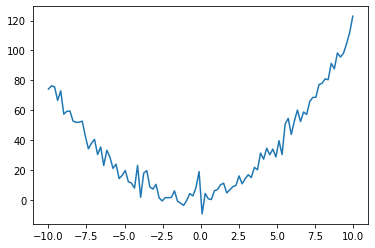

In [3]:
x = data[:,:-1].reshape(-1,1)
y = data[:,-1:].reshape(-1,1)
plt.plot(x,y)

In [4]:
X = np.concatenate(([x**i for i in range(0,3)]),axis=1)
X.shape

(100, 3)

In [54]:
class MyLinearRegression:
    import numpy as np
    
    def calculate_loss(self,y_hat,y):
        return 0.5*((y_hat-y)**2).mean()
    
    def calculate_gradient(self,X,y_hat,y):
        return X.T.dot(y_hat-y)/y.size
    
    def predict(self,X,weights):
        return X.dot(weights)
    
    def fit(self,X,y,lr=0.00001,n_epochs=100,batch_size=32,gamma=0.9):
        weights = self.np.random.rand(X.shape[1],1)
        
        m = X.shape[0]
        losses = []
        grads = []
        momentum = []
        v = np.zeros((X.shape[1],1))
        
        for _ in range(n_epochs):
            ids = self.np.random.permutation(m)
            X_shuffled = X[ids]
            y_shuffled = y[ids]
            for i in range(0,m,batch_size):
                Xi = X_shuffled[i:i+batch_size]
                yi = y_shuffled[i:i+batch_size]
                
                y_hat = self.predict(Xi,weights-gamma*v) # NAG -> calculate y_hat (and then gradient) using weights with momentum
                
                loss = self.calculate_loss(y_hat,yi)
                losses.append(loss)
                
                grad = self.calculate_gradient(Xi,y_hat,yi)
                
                weights -= (lr*grad + gamma*v)
                v = gamma*v + lr*grad
                momentum.append(v)
                
        self.momentum = momentum
        self.losses = losses
        self.weights = weights

In [61]:
model = MyLinearRegression()
model.fit(X,y,lr=0.0003)

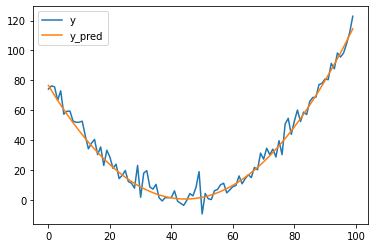

In [67]:
y_pred = model.predict(X,model.weights)
plt.plot(y,label='y')
plt.plot(y_pred,label='y_pred')
plt.legend()

3.137648507219218

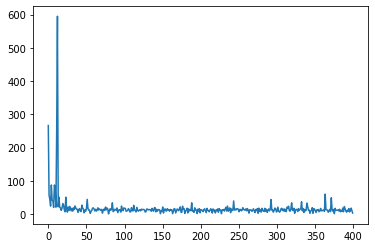

In [68]:
plt.plot(model.losses)
model.losses[-1]

In [65]:
momentum = np.array(model.momentum).reshape(400,3)

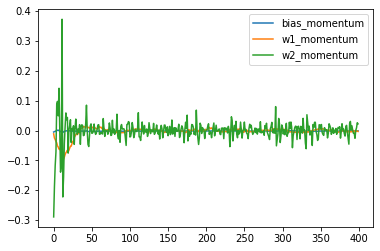

In [66]:
plt.plot(momentum[:,0],label='bias_momentum')
plt.plot(momentum[:,1],label='w1_momentum')
plt.plot(momentum[:,2],label='w2_momentum')
plt.legend()